# 1º Definimos el problema: ¿Qué se pretende predecir? ¿De qué datos se dispone? <span style="color:red">  Queremos predecir el precio del airbnb utilizando los datos disponibles del Dataset AirBnB</span>
## Importamos librerias

In [1]:


# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import seaborn as sns

# Gráficos
# ==============================================================================

from matplotlib import style
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# https://ipython.readthedocs.io/en/stable/interactive/plotting.html
%matplotlib inline 

# Preprocesado y modelado
# ==============================================================================
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Varios
# ==============================================================================
#import multiprocessing
#import random
#from itertools import product
#from fitter import Fitter, get_common_distributions



In [2]:


# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
#style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')



## Cargamos el dataset AirBnB y Dividimos en Train y Test

In [3]:
df=pd.read_csv("airbnb-listings-extract.csv", sep=";",header="infer")

full_df = pd.read_csv('airbnb-listings-extract.csv', sep=';', decimal='.')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('train.csv', sep=';', decimal='.', index=False)
test.to_csv('test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df = pd.read_csv('train.csv', sep=';', decimal='.')
df.head()


Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,...,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,15520134,https://www.airbnb.com/rooms/15520134,20170407214119,2017-04-08,por persona la noche metro linea5 vista alegre,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",NaN,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557","Host Has Profile Pic,Host Identity Verified,Is..."
3,8809721,https://www.airbnb.com/rooms/8809721,20170407214119,2017-04-08,CITY CENTER JACINTO BENAVENTE ROOM4,This stunning and amazig room is covered with ...,NaN,This stunning and amazig room is covered with ...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"40.4128140929,-3.70305247638","Host Has Profile Pic,Requires License"
4,1162707,https://www.airbnb.com/rooms/1162707,20170407214119,2017-04-08,NICE & BIG DOUBLE ROOM AT DOWNTOWN,NaN,We are a young couple; David (Spain) and Ana (...,We are a young couple; David (Spain) and Ana (...,none,NaN,...,10.0,9.0,9.0,NaN,NaN,strict,2.0,2.08,"40.4386311984,-3.71371613279","Host Has Profile Pic,Host Identity Verified,Is..."


# 2º ANALISIS EXPLORATORIO DE LOS DATOS: <span style="color:red">  Exploramos para entender los datos que se van a emplear para crear el modelo.</span>

In [4]:
f'Dimension del dataset:  {df.shape[0]} Filas por {df.shape[1]} Columnas'



'Dimension del dataset:  11824 Filas por 89 Columnas'

In [5]:
df.head(1)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,...,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.5,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              11824 non-null  int64  
 1   Listing Url                     11824 non-null  object 
 2   Scrape ID                       11824 non-null  int64  
 3   Last Scraped                    11824 non-null  object 
 4   Name                            11823 non-null  object 
 5   Summary                         11355 non-null  object 
 6   Space                           8718 non-null   object 
 7   Description                     11818 non-null  object 
 8   Experiences Offered             11824 non-null  object 
 9   Neighborhood Overview           7309 non-null   object 
 10  Notes                           4543 non-null   object 
 11  Transit                         7243 non-null   object 
 12  Access                          

# 3º PREPROCESAMOS LOS DATOS: <span style="color:red"> aplicamos las transformaciones necesarias para que los datos puedan ser interpretados por el algoritmo de machine learning seleccionado.</span>

In [7]:
# Observamos las columnas y eliminamos aquellas que no nos proporcionan informacion al modelo y/o se trata
# de variables categoricas que son dificiles de manejar para el modelo
df.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [8]:
pd.set_option('display.max_columns', None)
df.head(1)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,Facilitamos guía de eventos y rutas turísticas...,Excelente ubicación a tan solo 5 minutos andan...,La conexión a internet por fibra óptica 100 MB...,Recibimos personalmente a nuestros huéspedes y...,El apartamento se encuentra en un edificio res...,https://a0.muscache.com/im/pictures/74652419/f...,https://a0.muscache.com/im/pictures/74652419/f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/74652419/f...,31124866,https://www.airbnb.com/users/show/31124866,Inava,2015-04-13,"Arroyomolinos, Comunidad de Madrid, Spain",NaN,within a few hours,100.0,NaN,https://a0.muscache.com/im/users/31124866/prof...,https://a0.muscache.com/im/users/31124866/prof...,Jerónimos,2.0,2.0,"email,phone,reviews,work_email","Jerónimos, Madrid, Comunidad de Madrid 28014, ...",Jerónimos,Jerónimos,Retiro,Madrid,Comunidad de Madrid,28014,Madrid,"Madrid, Spain",ES,Spain,40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,60.0,550.0,1250.0,NaN,25.0,1,0,2,1125,2 weeks ago,NaN,9,32,52,117,2017-04-08,12,2015-04-26,2017-02-28,95.0,9.0,10.0,10.0,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.5,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."


In [9]:
df = df.drop(df.columns[df.columns.str.contains("Url")], axis=1)
df = df.drop(df.columns[df.columns.str.contains("URL")], axis=1)
df = df.drop(df.columns[df.columns.str.contains("ID")], axis=1)
df = df.drop(df.columns[df.columns.str.contains("Scraped")], axis=1)
columnas_eliminadas=['Host Name','Name','Summary','Space','Description','Neighborhood Overview','Host About','Notes',
                     'Transit','Access','Interaction','House Rules','Features']
df = df.drop(columnas_eliminadas, axis=1)
df.head()

,Experiences Offered,Host Since,Host Location,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation
0,none,2015-04-13,"Arroyomolinos, Comunidad de Madrid, Spain",within a few hours,100.0,NaN,Jerónimos,2.0,2.0,"email,phone,reviews,work_email","Jerónimos, Madrid, Comunidad de Madrid 28014, ...",Jerónimos,Jerónimos,Retiro,Madrid,Comunidad de Madrid,28014,Madrid,"Madrid, Spain",ES,Spain,40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,60.0,550.0,1250.0,NaN,25.0,1,0,2,1125,2 weeks ago,NaN,9,32,52,117,12,2015-04-26,2017-02-28,95.0,9.0,10.0,10.0,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733"
1,none,2016-07-22,"Madrid, Community of Madrid, Spain",within an hour,100.0,NaN,NaN,1.0,1.0,"email,phone,reviews,jumio,offline_government_i...","Madrid, Comunidad de Madrid 28012, Spain",NaN,Sol,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.415802,-3.705340,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,50.0,NaN,NaN,NaN,15.0,1,0,1,1125,today,NaN,15,39,64,208,20,2016-08-05,2017-03-20,91.0,9.0,9.0,10.0,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765"
2,none,2016-07-17,"Madrid, Community of Madrid, Spain",within an hour,100.0,NaN,Carabanchel,16.0,16.0,"email,phone,facebook,google,reviews,jumio,gove...","Carabanchel, Madrid, Comunidad de Madrid 28025...",Carabanchel,Vista Alegre,Carabanchel,Madrid,Comunidad de Madrid,28025,Madrid,"Madrid, Spain",ES,Spain,40.389048,-3.740374,Apartment,Shared room,1,1.5,1.0,8.0,Real Bed,"Internet,Wireless Internet,Wheelchair accessib...",NaN,10.0,NaN,NaN,NaN,5.0,1,0,3,30,a week ago,NaN,14,44,74,140,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557"
3,none,2014-05-08,"Madrid, Community of Madrid, Spain",within a few hours,100.0,NaN,Justicia,114.0,114.0,"email,phone,reviews,work_email","Madrid, Comunidad de Madrid 28012, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.412814,-3.703052,Apartment,Private room,2,3.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Smoking allowed,Heat...",NaN,30.0,NaN,NaN,NaN,NaN,1,0,10,1125,3 days ago,NaN,0,6,36,311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"40.4128140929,-3.70305247638"
4,none,2012-02-06,"Madrid, Community of Madrid, Spain",within an hour,100.0,NaN,Gaztambide,2.0,2.0,"email,phone,reviews,jumio","Gaztambide, Madrid, 28 28015, Spain",Gaztambide,Gaztambide,Chamberí,Madrid,28,28015,Madrid,"Madrid, Spain",ES,Spain,40.438631,-3.713716,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,32.0,NaN,NaN,NaN,NaN,1,10,1,1125,5 days ago,NaN,7,34,62,337,97,2013-06-07,2017-02-28,92.0,9.0,9.0,9.0,10.0,9.0,9.0,NaN,NaN,strict,2.0,2.08,"40.4386311984,-3.71371613279"


In [10]:
#Tratamiento de variables categoricas
print('Experiences Offered',len(df['Experiences Offered'].unique()))
print('Host Location',len(df['Host Location'].unique()))
print('Host Verifications',len(df['Host Verifications'].unique()))
print('Host Response Time',len(df['Host Response Time'].unique()))
print('Host Neighbourhood',len(df['Host Neighbourhood'].unique()))
print('Host Verifications',len(df['Host Verifications'].unique()))
print('Street',len(df['Street'].unique()))
print('Neighbourhood',len(df['Neighbourhood'].unique()))
print('Neighbourhood Cleansed',len(df['Neighbourhood Cleansed'].unique()))
print('Neighbourhood Group Cleansed',len(df['Street'].unique()))
print('City',len(df['City'].unique()))
print('State',len(df['State'].unique()))
print('Market',len(df['Market'].unique()))
print('Smart Location',len(df['Smart Location'].unique()))
print('Country Code',len(df['Country Code'].unique()))
print('Country',len(df['Country'].unique()))
print('Property Type',len(df['Property Type'].unique()))
print('Room Type',len(df['Room Type'].unique()))
print('Bed Type',len(df['Bed Type'].unique()))
print('Amenities',len(df['Amenities'].unique()))
print('Calendar Updated',len(df['Calendar Updated'].unique()))
print('Cancellation Policy',len(df['Cancellation Policy'].unique()))


# Siguiendo el prinmcipio de la navaja de Ockham segun cual la teoría más simple tiene más probabilidades de ser correcta 
# eliminos variables categoricas que contienen demasiados elementos para ser categorizadas.

df.drop(columns=['Host Location'], axis=1, inplace=True)
df.drop(columns=['Host Verifications'], axis=1, inplace=True)
df.drop(columns=['Host Neighbourhood'], axis=1, inplace=True)
df.drop(columns=['Neighbourhood Cleansed'], axis=1, inplace=True)
df.drop(columns=['Neighbourhood Group Cleansed'], axis=1, inplace=True)
df.drop(columns=['Amenities'], axis=1, inplace=True)
df.drop(columns=['Street'], axis=1, inplace=True)


Experiences Offered 5
Host Location 498
Host Verifications 192
Host Response Time 5
Host Neighbourhood 354
Host Verifications 192
Street 1438
Neighbourhood 352
Neighbourhood Cleansed 444
Neighbourhood Group Cleansed 1438
City 223
State 94
Market 43
Smart Location 232
Country Code 18
Country 18
Property Type 21
Room Type 3
Bed Type 5
Amenities 10078
Calendar Updated 57
Cancellation Policy 8


In [11]:
#Codificamos las variables 
    


EO= LabelEncoder()
HS= LabelEncoder() 
HRT= LabelEncoder()
HAR= LabelEncoder()
S= LabelEncoder() 
N= LabelEncoder() 
C= LabelEncoder()
Zp= LabelEncoder()
M= LabelEncoder() 
SL= LabelEncoder()
CC= LabelEncoder() 
Co= LabelEncoder()
PT= LabelEncoder() 
RT= LabelEncoder()
BT= LabelEncoder()
CU= LabelEncoder()
FR= LabelEncoder()
LR= LabelEncoder()
Li= LabelEncoder()
JN= LabelEncoder() 
CP= LabelEncoder() 
Ge= LabelEncoder()
St= LabelEncoder()


def codificacionColumnas(df):
    df['Experiences Offered'] = EO.fit_transform(df['Experiences Offered'])
    df['Host Since'] = HS.fit_transform(df['Host Since'])
    df['Host Response Time'] = HRT.fit_transform(df['Host Response Time'])
    df['Host Acceptance Rate'] = HAR.fit_transform(df['Host Acceptance Rate'])
    df['Neighbourhood'] = N.fit_transform(df['Neighbourhood'])
    df['City'] = C.fit_transform(df['City'])
    df['State'] = St.fit_transform(df['State'])
    df['Market'] = M.fit_transform(df['Market'])
    df['Smart Location'] = SL.fit_transform(df['Smart Location'])
    df['Country Code'] = CC.fit_transform(df['Country Code'])
    df['Country'] = Co.fit_transform(df['Country'])
    df['Property Type'] = PT.fit_transform(df['Property Type'])
    df['Room Type'] = RT.fit_transform(df['Room Type'])
    df['Bed Type'] = BT.fit_transform(df['Bed Type'])
    df['Calendar Updated'] = CU.fit_transform(df['Calendar Updated'])
    df['First Review'] = FR.fit_transform(df['First Review'])
    df['Last Review'] = LR.fit_transform(df['Last Review'])
    df['License'] = Li.fit_transform(df['License'])
    df['Jurisdiction Names'] = JN.fit_transform(df['Jurisdiction Names'])
    df['Cancellation Policy'] = CP.fit_transform(df['Cancellation Policy'])
    df['Geolocation'] = Ge.fit_transform(df['Geolocation'])

In [12]:
codificacionColumnas(df)

In [13]:
df.head()

,Experiences Offered,Host Since,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Listings Count,Host Total Listings Count,Neighbourhood,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation
0,2,1326,2,100.0,10,2.0,2.0,150,106,26,28014,21,115,8,13,40.407732,-3.684819,0,0,4,1.0,1.0,2.0,4,NaN,60.0,550.0,1250.0,NaN,25.0,1,0,2,1125,13,NaN,9,32,52,117,12,874,651,95.0,9.0,10.0,10.0,10.0,10.0,9.0,252,11,2,2.0,0.50,2285
1,2,1788,3,100.0,10,1.0,1.0,351,106,26,28012,21,115,8,13,40.415802,-3.705340,0,0,4,1.0,1.0,2.0,4,NaN,50.0,NaN,NaN,NaN,15.0,1,0,1,1125,55,NaN,15,39,64,208,20,1331,671,91.0,9.0,9.0,10.0,10.0,10.0,10.0,252,11,0,1.0,2.43,5128
2,2,1783,3,100.0,10,16.0,16.0,46,106,26,28025,21,115,8,13,40.389048,-3.740374,0,2,1,1.5,1.0,8.0,4,NaN,10.0,NaN,NaN,NaN,5.0,1,0,3,30,53,NaN,14,44,74,140,0,1583,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252,11,2,16.0,NaN,823
3,2,992,2,100.0,10,114.0,114.0,351,106,26,28012,21,115,8,13,40.412814,-3.703052,0,1,2,3.0,1.0,1.0,4,NaN,30.0,NaN,NaN,NaN,NaN,1,0,10,1125,24,NaN,0,6,36,311,0,1583,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252,11,4,97.0,NaN,4214
4,2,246,3,100.0,10,2.0,2.0,115,106,0,28015,21,115,8,13,40.438631,-3.713716,0,1,2,1.0,1.0,1.0,4,NaN,32.0,NaN,NaN,NaN,NaN,1,10,1,1125,38,NaN,7,34,62,337,97,322,651,92.0,9.0,9.0,9.0,10.0,9.0,9.0,252,11,4,2.0,2.08,9736


In [14]:
# Visualizamos aquellas columnas que contienen valores nulos.Elimino aquellos columnas que tienen demasiados elementos Nulos ya que podrian
# alterar los resultados del modelo al tener muy poca informacion :como por ejemplo 'Square Feet' y 'Has Availability'.Tambien las relacionadas 
# con el precio ya que lo que queremos es predecir el mismo.
pd.options.display.max_rows = 60
df.isnull().sum()



Experiences Offered                   0
Host Since                            0
Host Response Time                    0
Host Response Rate                 1507
Host Acceptance Rate                  0
Host Listings Count                   3
Host Total Listings Count             3
Neighbourhood                         0
City                                  0
State                                 0
Zipcode                             398
Market                                0
Smart Location                        0
Country Code                          0
Country                               0
Latitude                              0
Longitude                             0
Property Type                         0
Room Type                             0
Accommodates                          0
Bathrooms                            44
Bedrooms                             20
Beds                                 37
Bed Type                              0
Square Feet                       11350


In [15]:
columnas_eliminadas=['Square Feet','Has Availability','Weekly Price','Monthly Price','Security Deposit']
df = df.drop(columnas_eliminadas, axis=1)
df.isnull().sum()


Experiences Offered                  0
Host Since                           0
Host Response Time                   0
Host Response Rate                1507
Host Acceptance Rate                 0
Host Listings Count                  3
Host Total Listings Count            3
Neighbourhood                        0
City                                 0
State                                0
Zipcode                            398
Market                               0
Smart Location                       0
Country Code                         0
Country                              0
Latitude                             0
Longitude                            0
Property Type                        0
Room Type                            0
Accommodates                         0
Bathrooms                           44
Bedrooms                            20
Beds                                37
Bed Type                             0
Price                               15
Cleaning Fee             

In [16]:
# transformamos la columna Zipcode a int
df['Zipcode'] = pd.to_numeric(df['Zipcode'], errors='coerce').convert_dtypes() 
# Compruebo si hay 'NA'  --> df.isna().sum() --> Borro Na
df.dropna(subset='Zipcode',inplace=True,axis=0)
df.isnull().sum() 
df.shape
# Hemos eliminados algunas filas pero el conjunto de muestras siguer siendo relativamente bueno

(11257, 51)

In [17]:
#df= df.drop(df['Zipcode'].isna().index, axis=0)
pd.options.display.max_rows = 60
df.dropna(subset='Zipcode',inplace=True,axis=0)

In [18]:
df.shape

(11257, 51)

In [19]:
# Copruebo los valores NULL
df.isnull().sum() 

Experiences Offered                  0
Host Since                           0
Host Response Time                   0
Host Response Rate                1422
Host Acceptance Rate                 0
Host Listings Count                  3
Host Total Listings Count            3
Neighbourhood                        0
City                                 0
State                                0
Zipcode                              0
Market                               0
Smart Location                       0
Country Code                         0
Country                              0
Latitude                             0
Longitude                            0
Property Type                        0
Room Type                            0
Accommodates                         0
Bathrooms                           41
Bedrooms                            14
Beds                                32
Bed Type                             0
Price                               13
Cleaning Fee             

In [20]:
# Tratamos los valores Null rellenandolos con su media.
mediahrr=np.mean(df['Host Response Rate'])
df['Host Response Rate'].fillna(value=mediahrr,inplace=True)
mediahlc=np.mean(df['Host Listings Count'])
df['Host Listings Count'].fillna(value=mediahlc,inplace=True)
mediahtlc=np.mean(df['Host Total Listings Count'])
df['Host Total Listings Count'].fillna(value=mediahtlc,inplace=True)
mediab=np.mean(df['Bathrooms'])
df['Bathrooms'].fillna(value=mediab,inplace=True)
mediabe=np.mean(df['Bedrooms'])
df['Bedrooms'].fillna(value=mediabe,inplace=True)
mediabed=np.mean(df['Beds'])
df['Beds'].fillna(value=mediabed,inplace=True)
mediap=np.mean(df['Price'])
df['Price'].fillna(value=mediap,inplace=True)
mediarsr=np.mean(df['Review Scores Rating'])
df['Review Scores Rating'].fillna(value=mediarsr,inplace=True)
mediarsa=np.mean(df['Review Scores Accuracy'])
df['Review Scores Accuracy'].fillna(value=mediarsa,inplace=True)
mediarsc=np.mean(df['Review Scores Cleanliness'])
df['Review Scores Cleanliness'].fillna(value=mediarsc,inplace=True)
mediarsc2=np.mean(df['Review Scores Checkin'])
df['Review Scores Checkin'].fillna(value=mediarsc2,inplace=True)
mediarsc3=np.mean(df['Review Scores Communication'])
df['Review Scores Communication'].fillna(value=mediarsc3,inplace=True)
mediascl=np.mean(df['Review Scores Location'])
df['Review Scores Location'].fillna(value=mediascl,inplace=True)
mediarsv=np.mean(df['Review Scores Value'])
df['Review Scores Value'].fillna(value=mediarsv,inplace=True)
mediarpm=np.mean(df['Reviews per Month'])
df['Reviews per Month'].fillna(value=mediarpm,inplace=True)
mediacf=np.mean(df['Cleaning Fee'])
df['Cleaning Fee'].fillna(value=mediarpm,inplace=True)
df.isnull().sum()


Experiences Offered               0
Host Since                        0
Host Response Time                0
Host Response Rate                0
Host Acceptance Rate              0
Host Listings Count               0
Host Total Listings Count         0
Neighbourhood                     0
City                              0
State                             0
Zipcode                           0
Market                            0
Smart Location                    0
Country Code                      0
Country                           0
Latitude                          0
Longitude                         0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Bed Type                          0
Price                             0
Cleaning Fee                      0
Guests Included                   0
Extra People                

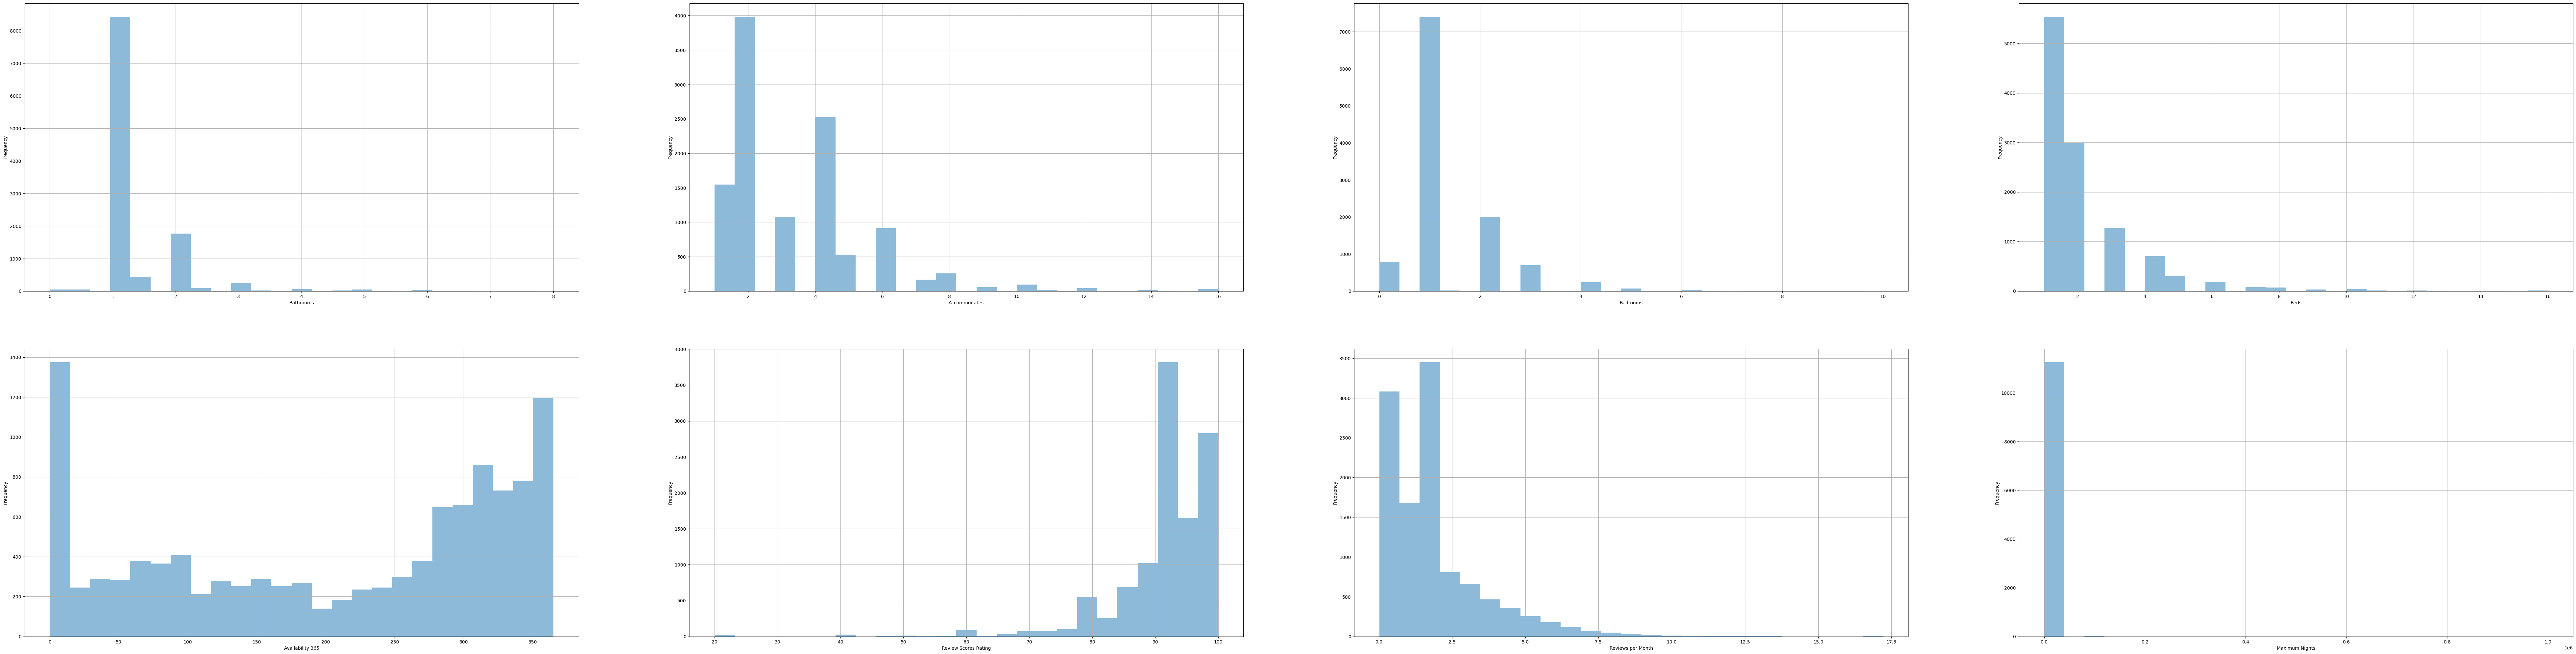

In [21]:
# Deteccion de outlayers
plt.figure(figsize=(100, 25))

plt.subplot(2,4,1)
df['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bathrooms')

plt.subplot(2,4,2)
df['Accommodates'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Accommodates')

plt.subplot(2,4,3)
df['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bedrooms')

plt.subplot(2,4,4)
df['Beds'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Beds')

plt.subplot(2,4,5)
df['Availability 365'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Availability 365')

plt.subplot(2,4,6)
df['Review Scores Rating'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Review Scores Rating')

plt.subplot(2,4,7)
df['Reviews per Month'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Reviews per Month')

plt.subplot(2,4,8)
df['Maximum Nights'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Maximum Nights')

plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x19ad12a1460>,
 'caps': [<matplotlib.lines.Line2D at 0x19ad12a19a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19ad12a11c0>],
 'medians': [<matplotlib.lines.Line2D at 0x19ad12a1ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19ad12871c0>],
 'means': []}

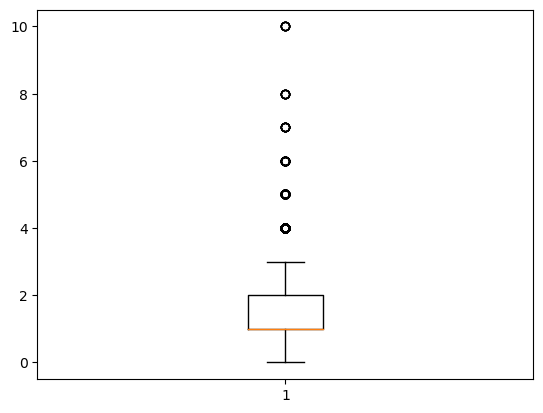

In [22]:
plt.boxplot(df['Bedrooms'])

<AxesSubplot: >

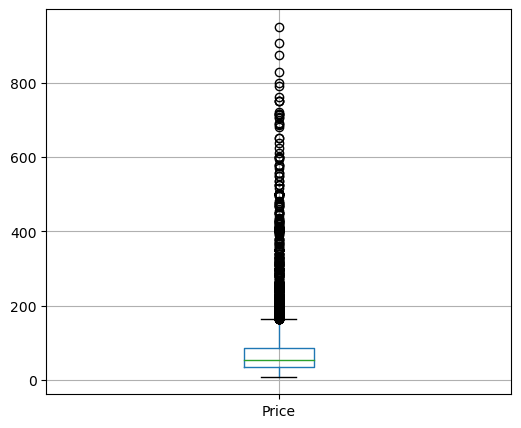

In [23]:
df.boxplot("Price", grid = True, figsize = (6,5))

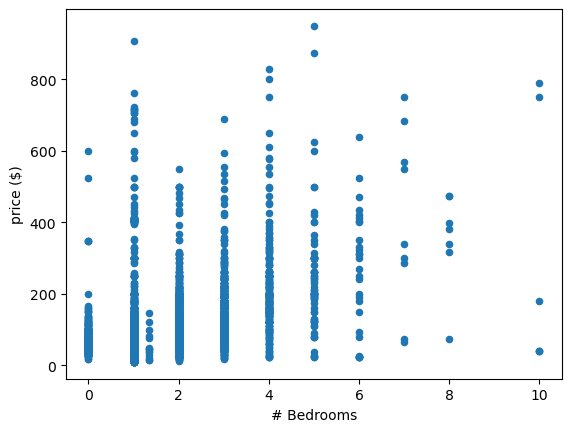

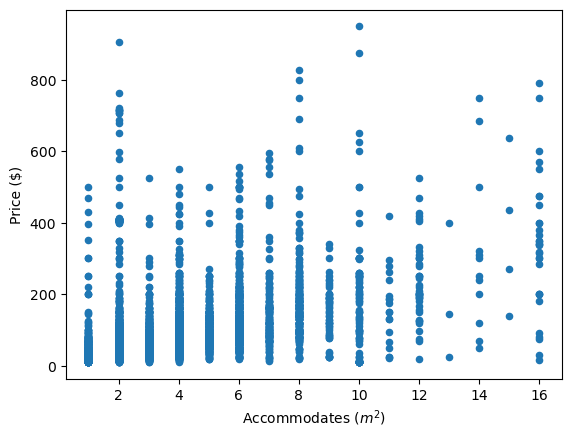

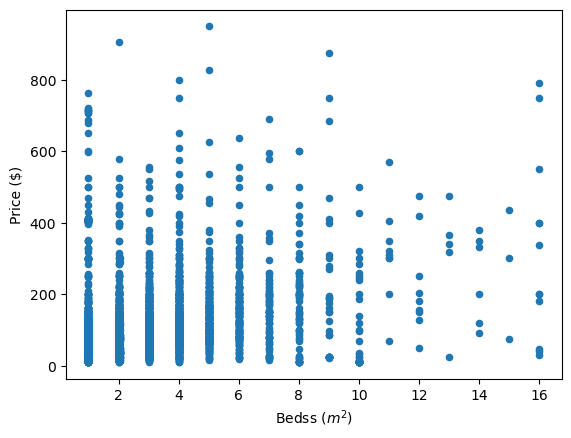

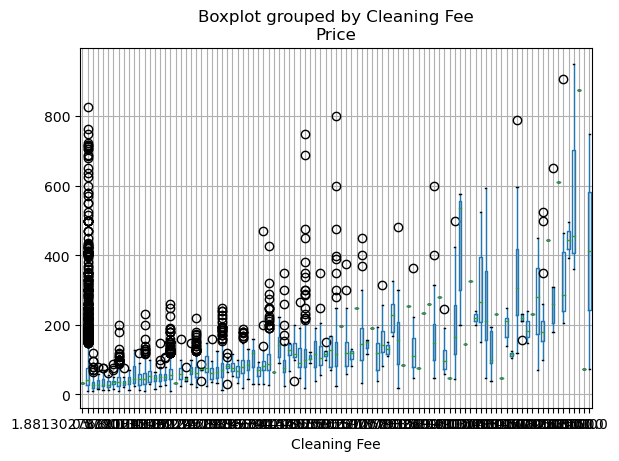

In [24]:
#'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Cleaning Fee'

df.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# Bedrooms')
plt.ylabel('price ($)')
plt.show()

df.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.xlabel('Accommodates ($m^2$)')
plt.ylabel('Price ($)')
plt.show()

df.plot(kind = 'scatter',x='Beds',y = 'Price')
plt.xlabel('Bedss ($m^2$)')
plt.ylabel('Price ($)')
plt.show()

df.boxplot(by='Cleaning Fee',column = 'Price')
plt.show()


# 3º SELECCION  DE CARACTERISTICAS: <span style="color:red"> En este apartado buscamos seleccionar las caracteristicas, buscar correlaciones con la variable objetivo, evitar la colinealidad ,etc..</span>

In [25]:
# Parece que la variable objetivo toma forma de una distribución de cola larga.Si tengo tiempo
# hare pruebas transformando la variable objetivo a una distribucion mas gaussiana o normal aplicandole el logaritmo.




In [26]:
# Buscamos La correlacion entre las variables
df.corr()

,Experiences Offered,Host Since,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Listings Count,Host Total Listings Count,Neighbourhood,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation
Experiences Offered,1.000000,0.004666,0.022405,0.040182,-0.000482,0.003625,0.003625,0.015358,0.022213,-0.001282,0.040732,0.024550,0.024123,-0.048676,0.027523,-0.036015,0.002250,0.005458,0.001643,-0.012211,-0.007172,-0.004446,-0.004703,-0.001692,-0.005321,-0.001660,-0.011648,-0.014574,-0.000511,0.001251,0.018974,0.012141,0.013261,0.015515,0.019946,-0.000185,0.010742,0.032377,0.020800,0.031771,0.028350,0.017128,-0.006606,0.022417,0.033010,-0.001716,-0.001414,-0.013540,0.004104,0.008524,-0.022515
Host Since,0.004666,1.000000,0.064901,-0.040684,0.030081,-0.047049,-0.047049,0.102569,0.017967,-0.133113,0.015547,-0.018983,0.022342,-0.053135,0.051516,-0.000110,0.032951,0.034362,0.133149,-0.111467,-0.059078,-0.082231,-0.086597,0.002891,-0.077702,-0.147481,-0.086537,-0.106284,-0.030449,-0.006614,-0.029494,0.042495,0.046974,0.054488,-0.112332,-0.250754,0.531257,0.204357,0.018451,0.042791,0.019320,0.036475,0.031418,-0.020689,0.032162,0.065231,0.075067,-0.164673,-0.097802,0.141879,-0.000496
Host Response Time,0.022405,0.064901,1.000000,0.494838,-0.005203,-0.062940,-0.062940,-0.015085,-0.000162,0.035009,0.013524,-0.008828,-0.000415,-0.024591,-0.034057,-0.029540,0.031040,-0.019198,0.009161,-0.064196,-0.076085,-0.065100,-0.070465,0.008245,-0.011493,-0.003243,-0.014376,-0.027951,0.009679,0.005679,0.000657,-0.147186,-0.162434,-0.173737,-0.167025,0.059270,0.076765,0.071674,0.039218,0.035294,0.042478,0.045129,0.044494,0.029389,0.038836,-0.017704,0.003267,-0.036167,-0.095091,0.157539,-0.001504
Host Response Rate,0.040182,-0.040684,0.494838,1.000000,-0.012767,-0.013172,-0.013172,-0.030751,-0.026976,-0.026983,-0.020730,-0.008012,-0.027317,-0.003410,0.017132,-0.012823,0.004521,-0.008338,-0.074872,0.057869,-0.027503,0.014175,0.036573,-0.005946,-0.001300,0.054305,0.064163,0.029375,0.004590,0.001320,0.062739,-0.127855,-0.108201,-0.095868,-0.026985,0.127680,-0.061690,0.087149,0.081408,0.069888,0.085855,0.085835,0.075435,0.044245,0.076976,-0.037400,0.021378,0.072275,-0.033714,0.143635,-0.031920
Host Acceptance Rate,-0.000482,0.030081,-0.005203,-0.012767,1.000000,0.012238,0.012238,0.017102,-0.049651,-0.069916,-0.190882,-0.056505,-0.043533,-0.182259,-0.053079,0.021698,0.209818,-0.054341,0.023674,-0.016210,0.000423,-0.009289,0.000894,-0.005099,-0.034353,-0.060505,-0.027455,-0.021287,0.000443,0.001908,-0.011657,-0.004158,-0.004177,-0.005830,0.009273,-0.011447,0.023296,0.064038,-0.017598,-0.013187,-0.016829,-0.012265,-0.008014,-0.003370,-0.023497,-0.005172,0.050831,-0.005954,0.012905,-0.039684,-0.004953
Host Listings Count,0.003625,-0.047049,-0.062940,-0.013172,0.012238,1.000000,1.000000,0.000235,-0.197943,-0.089824,-0.226111,-0.183496,-0.208307,-0.027018,0.015426,0.012136,0.049144,0.016385,-0.155713,0.225271,0.227265,0.180377,0.167667,0.019728,0.231684,0.183488,0.072829,0.009933,0.022430,0.004795,0.142659,-0.023975,-0.052896,-0.066830,-0.004500,-0.121993,0.093613,-0.043236,-0.122684,-0.087170,-0.046067,-0.184725,-0.164695,-0.039801,-0.106743,-0.043031,0.034603,0.278008,0.918286,-0.118127,0.009640
Host Total Listings Count,0.003625,-0.047049,-0.062940,-0.013172,0.012238,1.000000,1.000000,0.000235,-0.197943,-0.089824,-0.226111,-0.183496,-0.208307,-0.027018,0.015426,0.012136,0.049144,0.016385,-0.15571

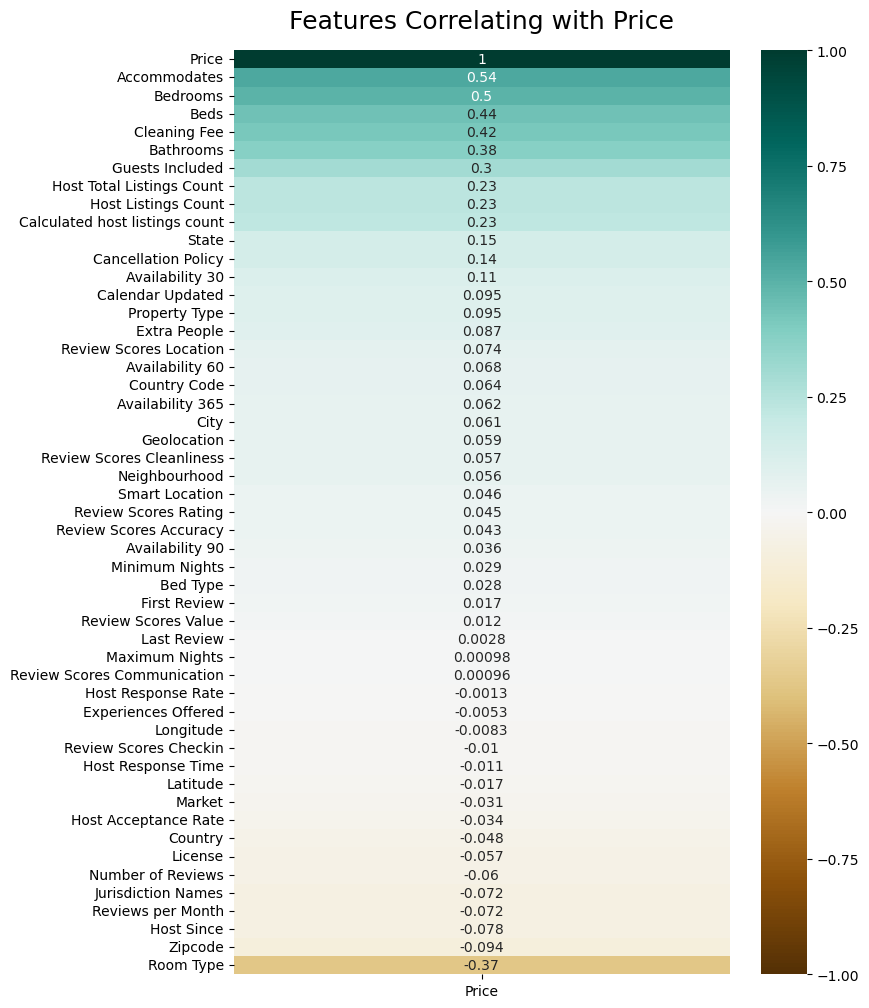

In [27]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Price']].sort_values(by='Price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':18}, pad=16);

In [28]:
# Parece que las variables que mas correlacionan con la variable objetivos son aquellas relacionadas
# con el tipo de habitacion , numero de baños,dormitorios,etc


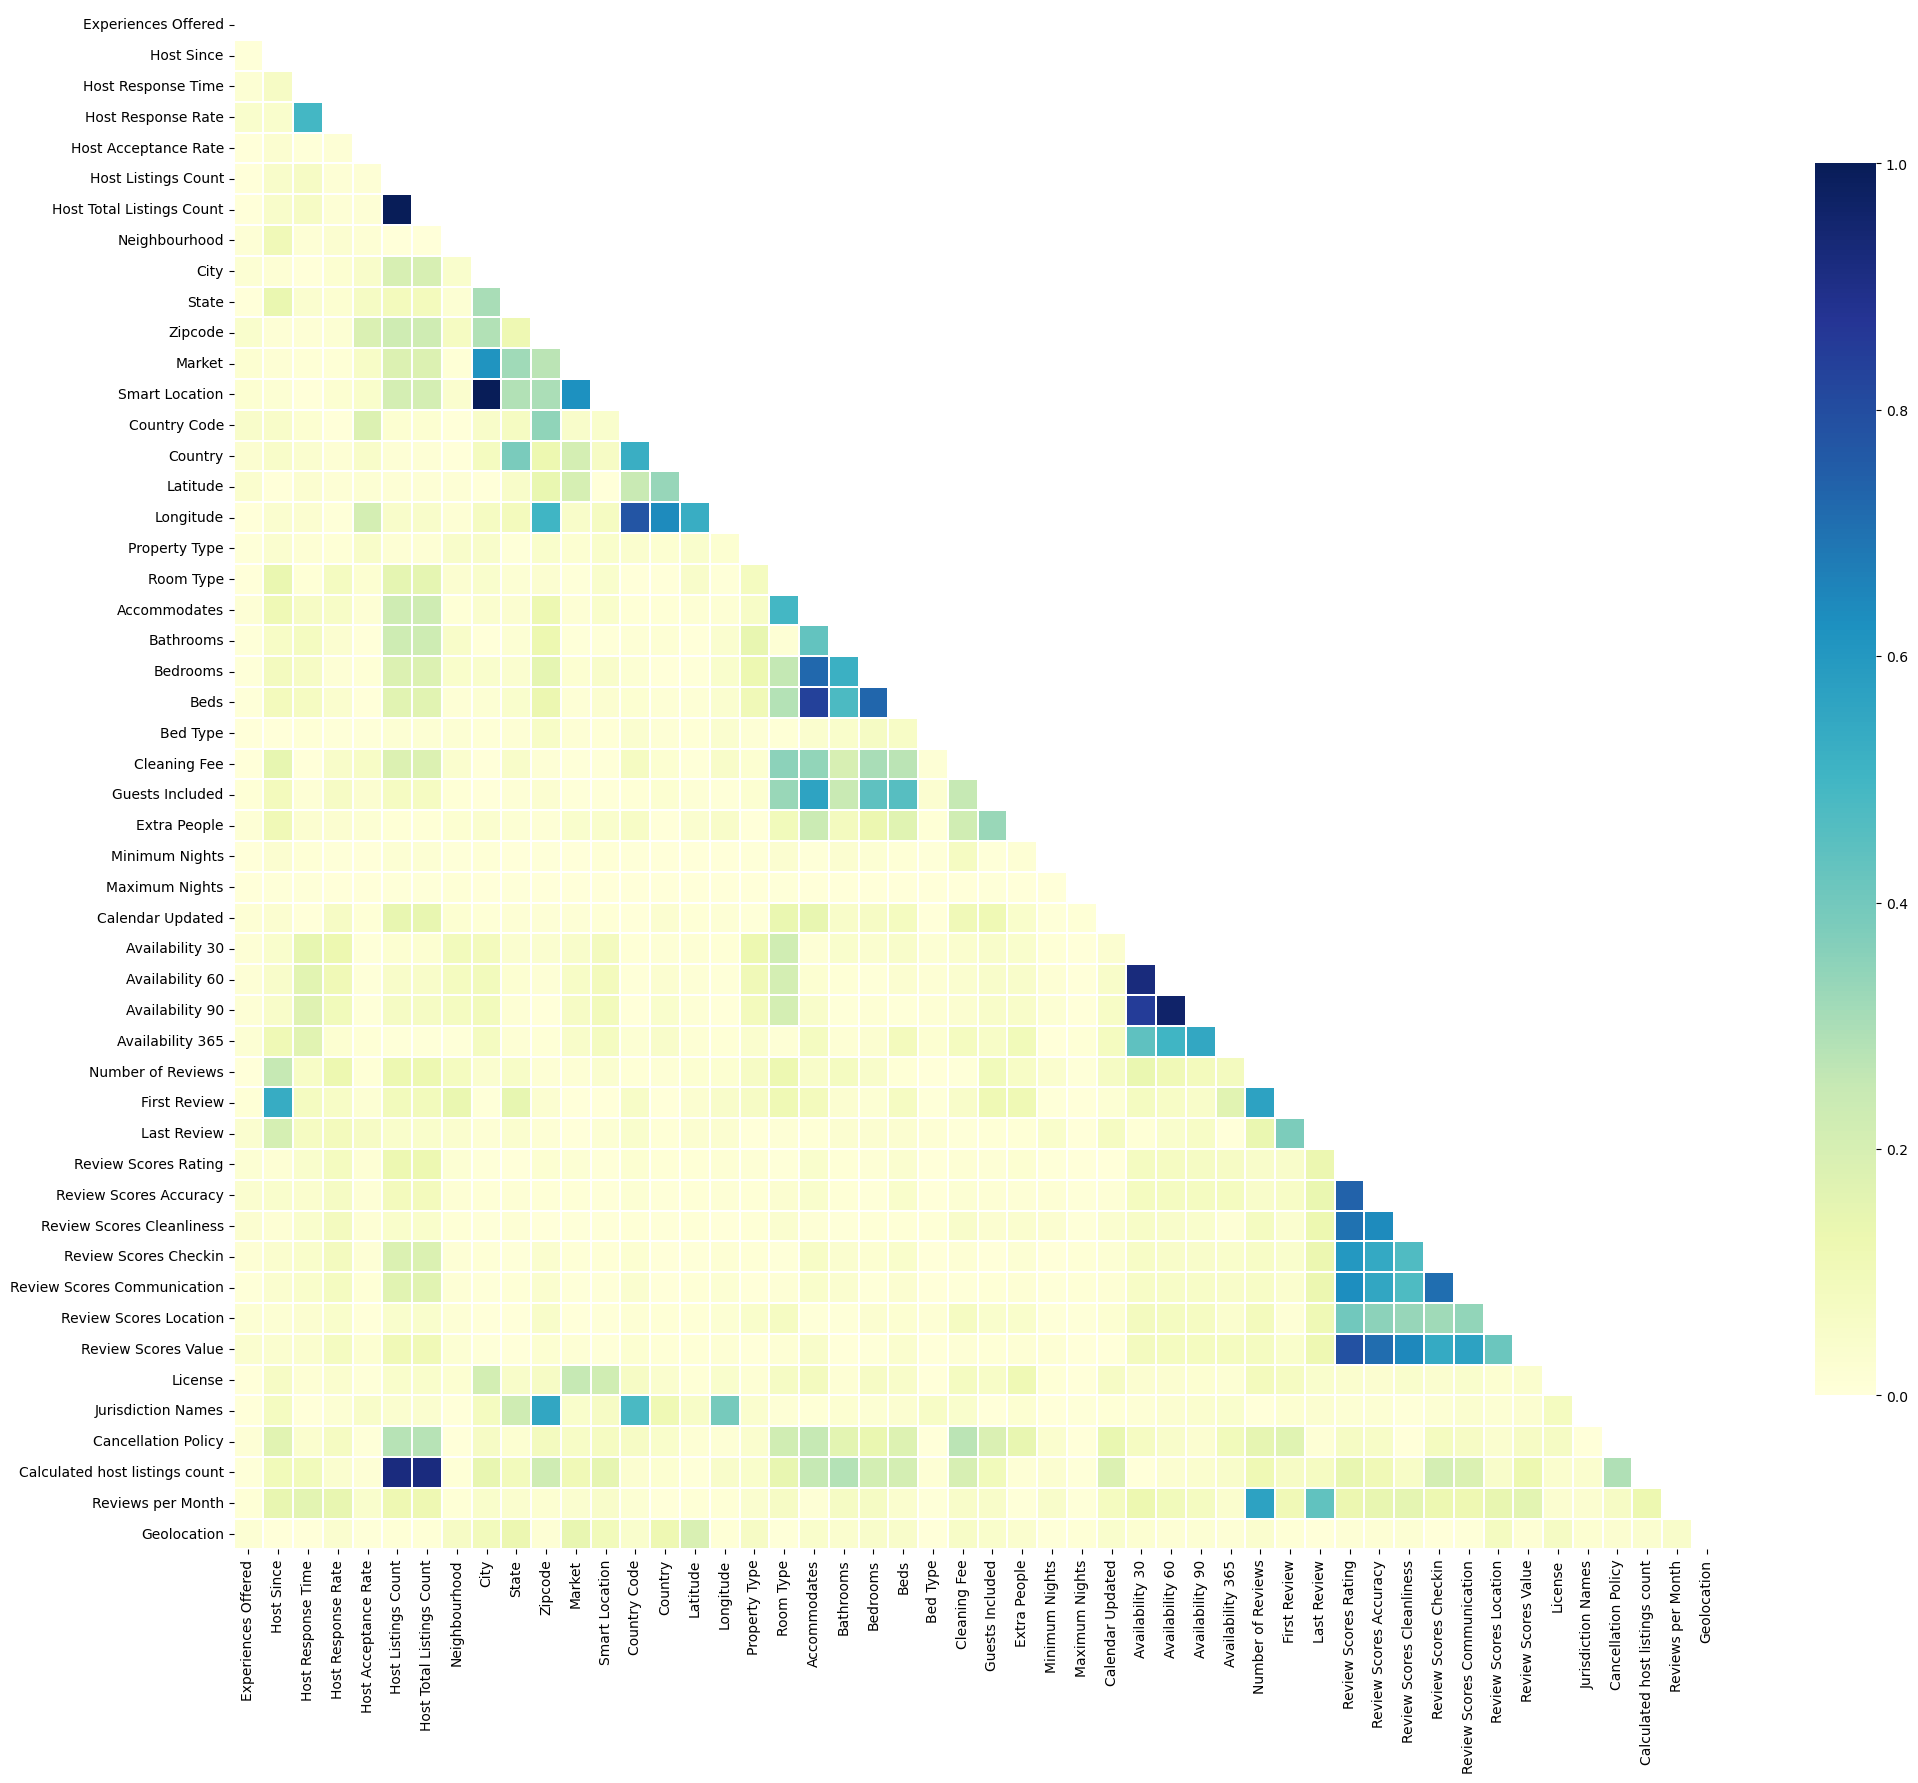

In [29]:
# Evitamos la colinealidad en nuestro modelo 

# Compute the correlation matrix
corr = np.abs(df.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(24, 20))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [30]:


print(' Eliminamos variables si hay alta colinealidad entre ellas\n')

print('Correlación : ', df['Calculated host listings count'].corr(df['Host Listings Count'], method='pearson')) # Eliminamos >0,9
print('Correlación : ', df['Host Total Listings Count'].corr(df['Host Listings Count'], method='pearson')) # Eliminamos >0,9
print('Correlación : ', df['Smart Location'].corr(df['City'], method='pearson')) # Eliminamos >0,9
print('Correlación : ', df['Accommodates'].corr(df['Beds'], method='pearson')) # No eliminamos >0.80

#eliminamos Availability 30,60,90 Por su alta correlacion
#Smart Location
#Host Total Listings Count
#Calculated host listings count
df.drop(columns='Availability 30',inplace=True,axis=1)
df.drop(columns='Availability 60',inplace=True,axis=1)
df.drop(columns='Availability 90',inplace=True,axis=1)
df.drop(columns='Smart Location',inplace=True,axis=1)
df.drop(columns='Host Total Listings Count',inplace=True,axis=1)
df.drop(columns='Calculated host listings count',inplace=True,axis=1)


 Eliminamos variables si hay alta colinealidad entre ellas

Correlación :  0.9182862392893179
Correlación :  1.0
Correlación :  0.9966104552295997
Correlación :  0.8353779431605401


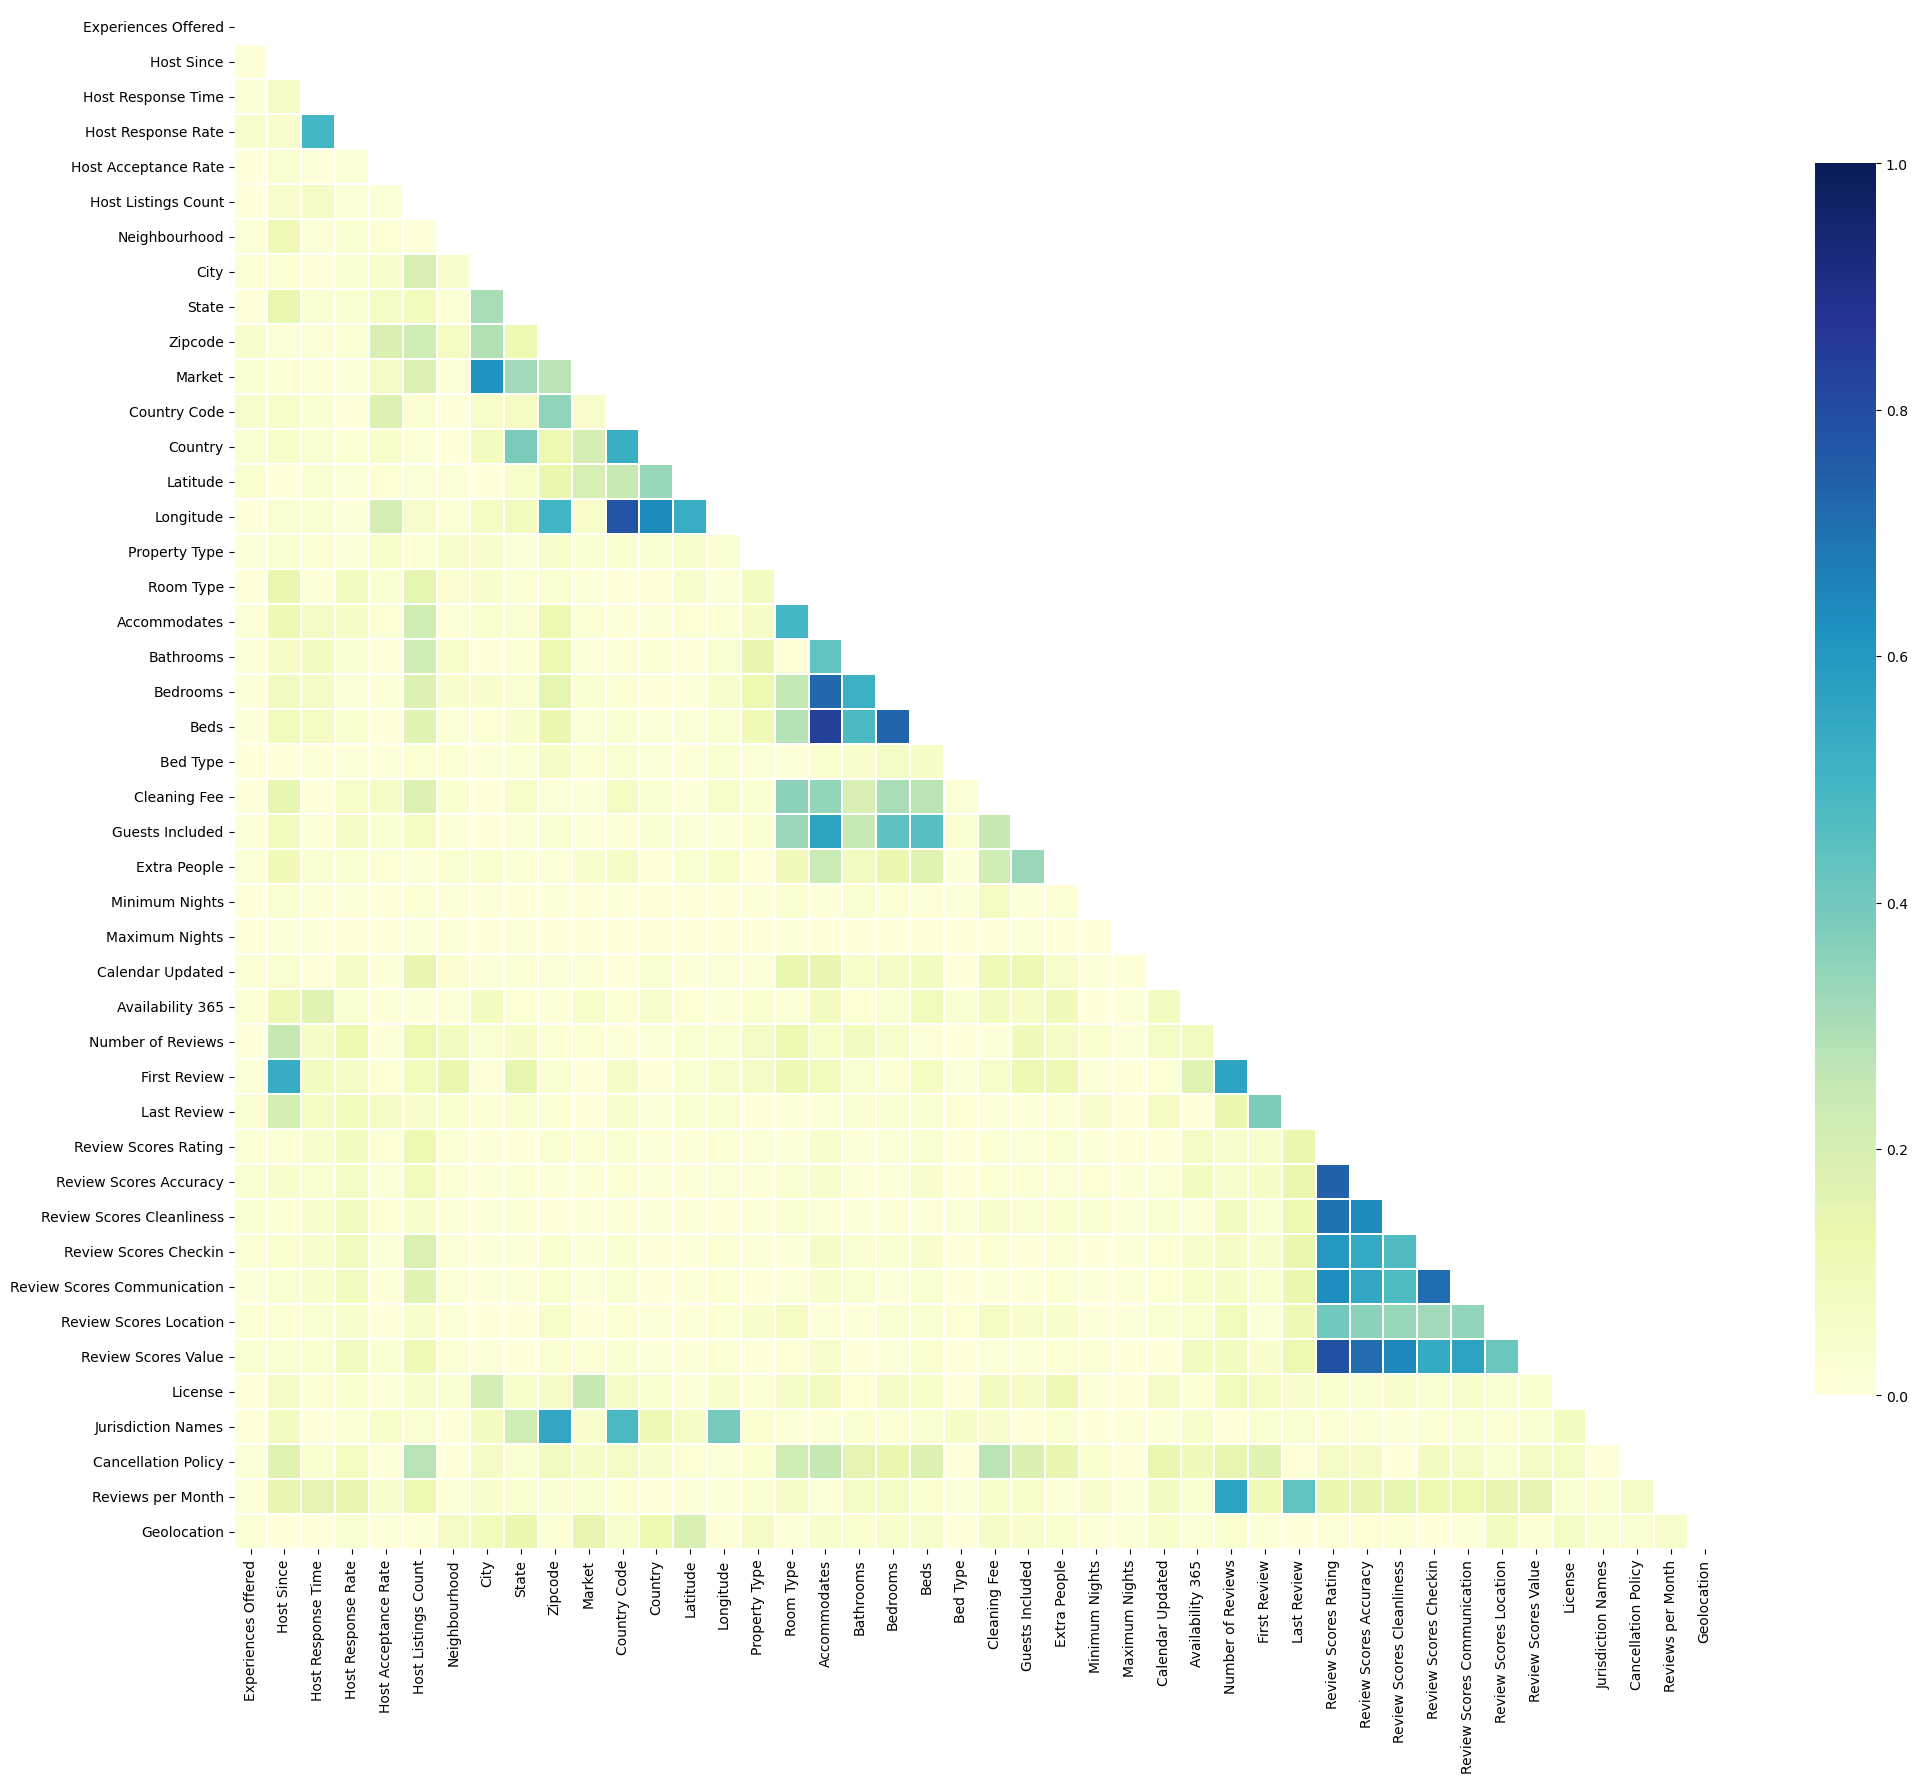

In [31]:
# Verificamos que no haya  Colinealidad

# Compute the correlation matrix
corr = np.abs(df.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(24, 20))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

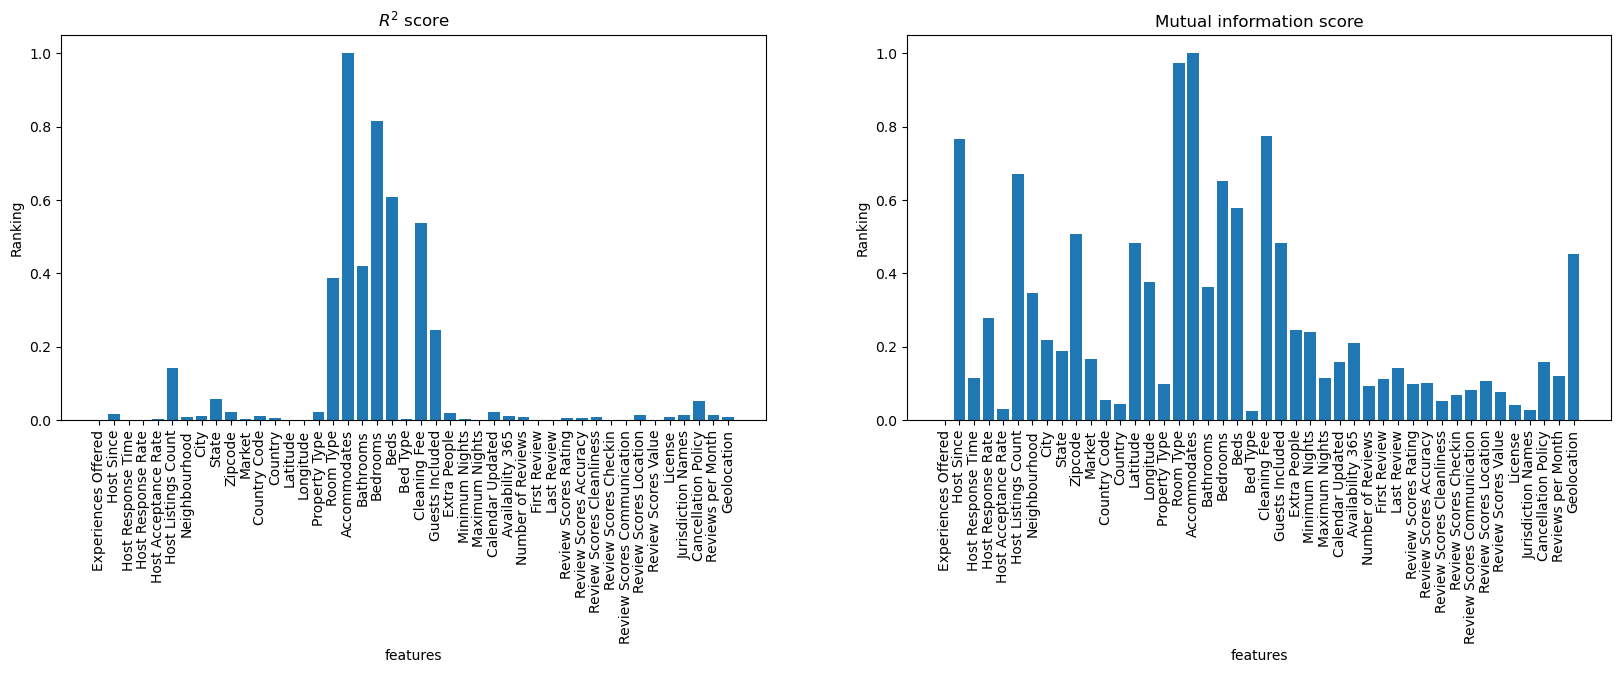

In [32]:
# convertimos el DataFrame al formato necesario para scikit-learn
from sklearn.feature_selection import f_regression, mutual_info_regression

X = df.drop(['Price'], axis=1).values
y = df['Price'].values
feature_names = df.drop(['Price'], axis=1).columns


# do calculations
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$R^2$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

In [33]:
# variables seleccionadas con f_test
selected_f_test=feature_names[f_test>0.4]
print(selected_f_test)

Index(['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Cleaning Fee'], dtype='object')


In [34]:
# Preprocesado

y_train = df['Price'].values    # nos quedamos con price
X_train = df.drop(['Price'],axis=1).values     # nos quedamos con el resto
feature_names = df.drop(['Price'],axis=1).columns
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [35]:
# creamos Xtrain con las features seleccionadas con f_test
X_train_ftest=XtrainScaled[:,feature_names.isin(selected_f_test)]

X_train_ftest.shape

(11257, 5)

# 4º MODELADO: <span style="color:red"> Creamos Nuestros modelo</span>

### LASSO


best mean cross-validation score: -3117.208
best parameters: {'alpha': 1e-07}


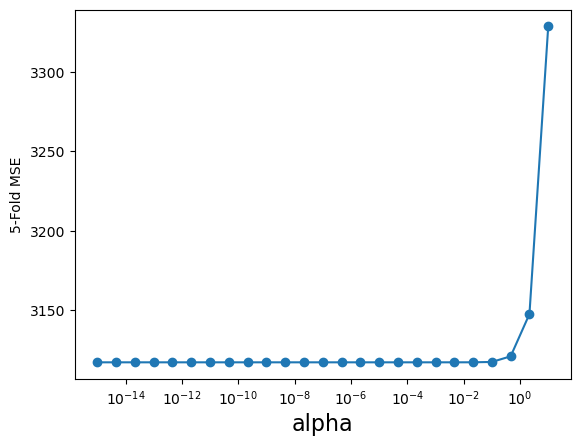

In [36]:
alpha_vector = np.logspace(-15,1,25)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(X_train_ftest, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))


scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
# plt.ylim((1650, 1670))
plt.show()

In [37]:
alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(X_train_ftest,y_train)

w = lasso.coef_

# predicción
y_hat_train = lasso.predict(X_train_ftest)


# error
error_train = np.mean(np.power(y_train - y_hat_train,2))

print("Train: ",error_train)

coef_names = ['w' + str(i) + ': ' for i in range(1,len(w)+1)]
for f,wi in zip(coef_names,w):
    print(f,wi)

Train:  3093.6062737692405
w1:  26.218350154287236
w2:  10.033412886023365
w3:  12.347281653874482
w4:  -8.949667453377968
w5:  17.637763831810737


## Arbol de decision indivual

best mean cross-validation score: 0.522
best parameters: {'max_depth': 4}


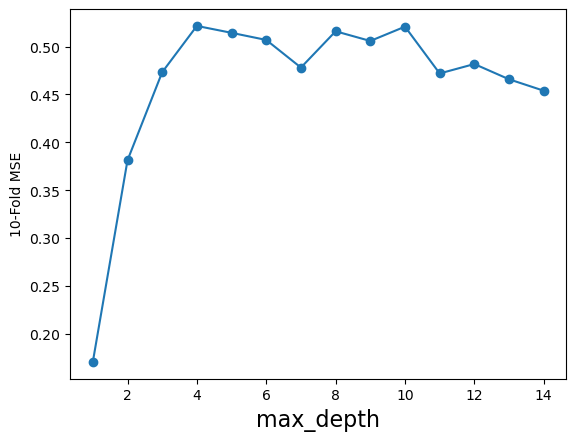

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [39]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))

Train:  0.5824015267011404


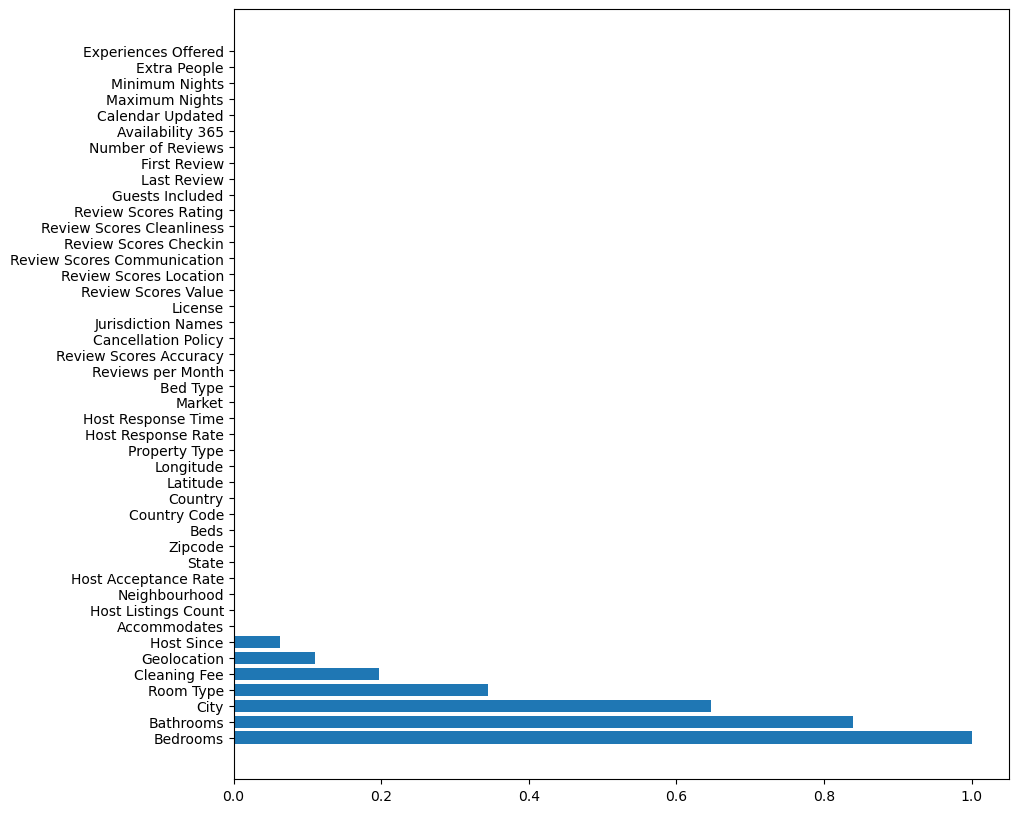

In [40]:
importances = treeModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

## Random forest

Fitting 10 folds for each of 14 candidates, totalling 140 fits
best mean cross-validation score: 0.674
best parameters: {'max_depth': 13}


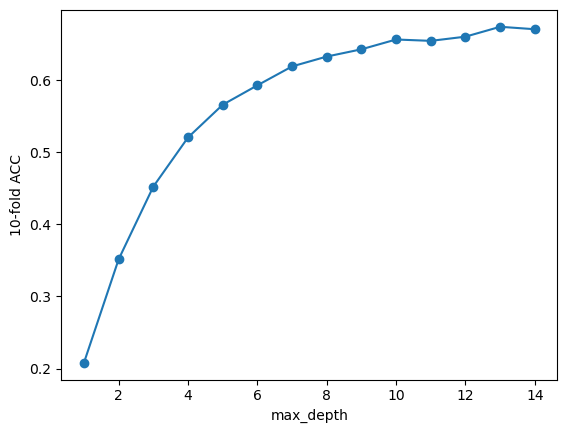

In [41]:
from sklearn.ensemble import RandomForestRegressor
# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=20, max_features='sqrt'), param_grid=tuned_parameters,cv=10,verbose=1) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [42]:
maxDepthOptimo = 10#grid.best_params_['max_depth']
forestModel = RandomForestRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",forestModel.score(X_train,y_train))

Train:  0.8419581178533497


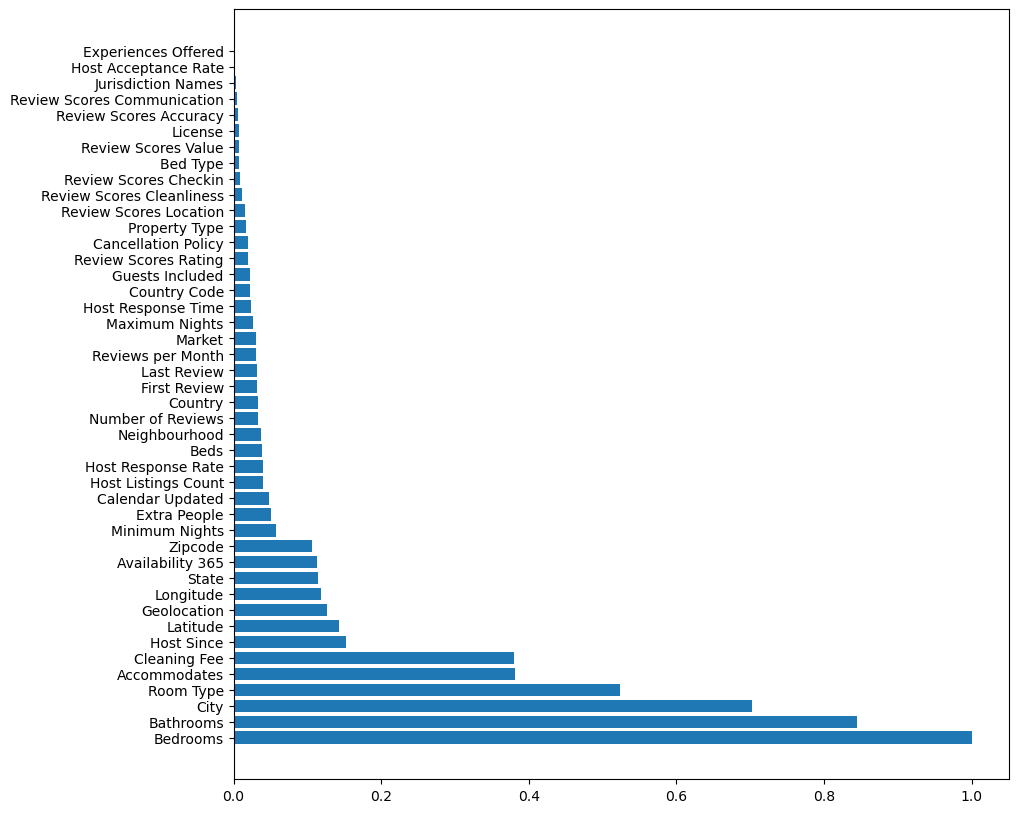

In [43]:
importances = forestModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

## XGboost

In [44]:
from xgboost import XGBRegressor
Niterations = [500,1000,1500,2000]
# Niterations = [20,50,100,500]
learningRate = [0.1,0.05,0.01]
# mantenemos max_depth estático: max_depth=3
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(XGBRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5,verbose=1)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
best mean cross-validation score: 0.683
best parameters: {'learning_rate': 0.05, 'n_estimators': 2000}


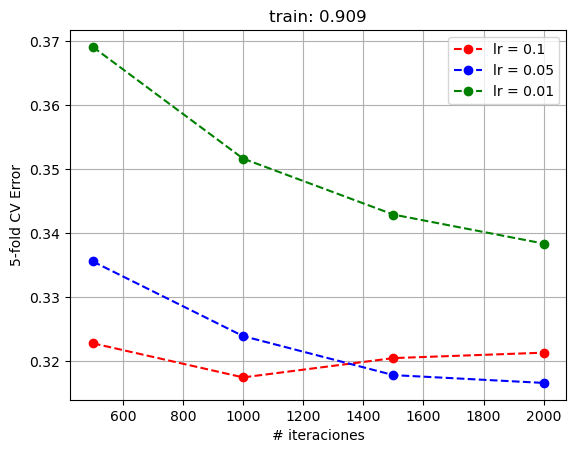

Train:  0.9089133185865168


In [45]:
# calculamos métricas globales
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
xgbt = XGBRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
xgbt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
# plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_val,y_val)))
plt.title('train: %0.3f'%(xgbt.score(X_train,y_train)))
plt.grid()
plt.show()

print("Train: ",xgbt.score(X_train,y_train))

# Evaluar con test

In [46]:
df_test = pd.read_csv('test.csv', sep=';', decimal='.')
#Aplicamos las mismas transformaciones que en train

In [47]:
#Eliminacion de columnas
df_test = df_test.drop(df_test.columns[df_test.columns.str.contains("Url")], axis=1)
df_test = df_test.drop(df_test.columns[df_test.columns.str.contains("URL")], axis=1)
df_test = df_test.drop(df_test.columns[df_test.columns.str.contains("ID")], axis=1)
df_test = df_test.drop(df_test.columns[df_test.columns.str.contains("Scraped")], axis=1)
columnas_eliminadas=['Host Name','Name','Summary','Space','Description','Neighborhood Overview','Host About','Notes',
                     'Transit','Access','Interaction','House Rules','Features']
df_test = df_test.drop(columnas_eliminadas, axis=1)
df_test.drop(columns=['Host Location'], axis=1, inplace=True)
df_test.drop(columns=['Host Verifications'], axis=1, inplace=True)
df_test.drop(columns=['Host Neighbourhood'], axis=1, inplace=True)
df_test.drop(columns=['Neighbourhood Cleansed'], axis=1, inplace=True)
df_test.drop(columns=['Neighbourhood Group Cleansed'], axis=1, inplace=True)
df_test.drop(columns=['Amenities'], axis=1, inplace=True)
df_test.drop(columns=['Street'], axis=1, inplace=True)

columnas_eliminadas=['Square Feet','Has Availability','Weekly Price','Monthly Price','Security Deposit']
df_test = df_test.drop(columnas_eliminadas, axis=1)

df_test.drop(columns='Availability 30',inplace=True,axis=1)
df_test.drop(columns='Availability 60',inplace=True,axis=1)
df_test.drop(columns='Availability 90',inplace=True,axis=1)
df_test.drop(columns='Smart Location',inplace=True,axis=1)
df_test.drop(columns='Host Total Listings Count',inplace=True,axis=1)
df_test.drop(columns='Calculated host listings count',inplace=True,axis=1)


In [48]:
df_test['Zipcode'] = pd.to_numeric(df_test['Zipcode'], errors='coerce').convert_dtypes() 
df_test.dropna(subset='Zipcode',inplace=True,axis=0)


In [49]:
# Codificamos variables categoricas

EO= LabelEncoder()
HS= LabelEncoder() 
HRT= LabelEncoder()
HAR= LabelEncoder()
S= LabelEncoder() 
N= LabelEncoder() 
C= LabelEncoder()
Zp= LabelEncoder()
M= LabelEncoder() 
SL= LabelEncoder()
CC= LabelEncoder() 
Co= LabelEncoder()
PT= LabelEncoder() 
RT= LabelEncoder()
St= LabelEncoder()
BT= LabelEncoder()
CU= LabelEncoder()
FR= LabelEncoder()
LR= LabelEncoder()
Li= LabelEncoder()
JN= LabelEncoder() 
CP= LabelEncoder() 
Ge= LabelEncoder()



def codificacionColumnas(df):
    df_test['Experiences Offered'] = EO.fit_transform(df_test['Experiences Offered'])
    df_test['Host Since'] = HS.fit_transform(df_test['Host Since'])
    df_test['Host Response Time'] = HRT.fit_transform(df_test['Host Response Time'])
    df_test['Host Acceptance Rate'] = HAR.fit_transform(df_test['Host Acceptance Rate'])
    df_test['Neighbourhood'] = N.fit_transform(df_test['Neighbourhood'])
    df_test['City'] = C.fit_transform(df_test['City'])
    df_test['State'] = St.fit_transform(df_test['State'])
    df_test['Market'] = M.fit_transform(df_test['Market'])
    df_test['Country Code'] = CC.fit_transform(df_test['Country Code'])
    df_test['Country'] = Co.fit_transform(df_test['Country'])
    df_test['Property Type'] = PT.fit_transform(df_test['Property Type'])
    df_test['Room Type'] = RT.fit_transform(df_test['Room Type'])
    df_test['Bed Type'] = BT.fit_transform(df_test['Bed Type'])
    df_test['Calendar Updated'] = CU.fit_transform(df_test['Calendar Updated'])
    df_test['First Review'] = FR.fit_transform(df_test['First Review'])
    df_test['Last Review'] = LR.fit_transform(df_test['Last Review'])
    df_test['License'] = Li.fit_transform(df_test['License'])
    df_test['Jurisdiction Names'] = JN.fit_transform(df_test['Jurisdiction Names'])
    df_test['Cancellation Policy'] = CP.fit_transform(df_test['Cancellation Policy'])
    df_test['Geolocation'] = Ge.fit_transform(df_test['Geolocation'])
    
codificacionColumnas(df_test)

In [54]:
mediahrr=np.mean(df_test['Host Response Rate'])
df_test['Host Response Rate'].fillna(value=mediahrr,inplace=True)
mediahlc=np.mean(df_test['Host Listings Count'])
df_test['Host Listings Count'].fillna(value=mediahlc,inplace=True)

mediab=np.mean(df_test['Bathrooms'])
df_test['Bathrooms'].fillna(value=mediab,inplace=True)
mediabe=np.mean(df_test['Bedrooms'])
df_test['Bedrooms'].fillna(value=mediabe,inplace=True)
mediabed=np.mean(df_test['Beds'])
df_test['Beds'].fillna(value=mediabed,inplace=True)
mediap=np.mean(df_test['Price'])
df_test['Price'].fillna(value=mediap,inplace=True)
mediarsr=np.mean(df_test['Review Scores Rating'])
df_test['Review Scores Rating'].fillna(value=mediarsr,inplace=True)
mediarsa=np.mean(df_test['Review Scores Accuracy'])
df_test['Review Scores Accuracy'].fillna(value=mediarsa,inplace=True)

mediaCf=np.mean(df_test['Cleaning Fee'])
df_test['Cleaning Fee'].fillna(value=mediaCf,inplace=True)

mediarsc=np.mean(df_test['Review Scores Cleanliness'])
df_test['Review Scores Cleanliness'].fillna(value=mediarsc,inplace=True)
mediarsc2=np.mean(df_test['Review Scores Checkin'])
df_test['Review Scores Checkin'].fillna(value=mediarsc2,inplace=True)
mediarsc3=np.mean(df_test['Review Scores Communication'])
df_test['Review Scores Communication'].fillna(value=mediarsc3,inplace=True)
mediascl=np.mean(df_test['Review Scores Location'])
df_test['Review Scores Location'].fillna(value=mediascl,inplace=True)
mediarsv=np.mean(df_test['Review Scores Value'])
df_test['Review Scores Value'].fillna(value=mediarsv,inplace=True)
mediarpm=np.mean(df_test['Reviews per Month'])
df_test['Reviews per Month'].fillna(value=mediarpm,inplace=True)
df_test.isnull().sum() 

Experiences Offered            0
Host Since                     0
Host Response Time             0
Host Response Rate             0
Host Acceptance Rate           0
Host Listings Count            0
Neighbourhood                  0
City                           0
State                          0
Zipcode                        0
Market                         0
Country Code                   0
Country                        0
Latitude                       0
Longitude                      0
Property Type                  0
Room Type                      0
Accommodates                   0
Bathrooms                      0
Bedrooms                       0
Beds                           0
Bed Type                       0
Price                          0
Cleaning Fee                   0
Guests Included                0
Extra People                   0
Minimum Nights                 0
Maximum Nights                 0
Calendar Updated               0
Availability 365               0
Number of 

In [55]:
y_test = df_test['Price'].values    # nos quedamos con price
X_test = df_test.drop(['Price'],axis=1).values     # nos quedamos con el resto
feature_names_test = df_test.drop(['Price'],axis=1).columns

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

### Comprobamos los Modelos

In [57]:
print('Arbol de decision individual')
print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Arbol de decision individual
Train:  0.5824015267011404
Test:  0.4850194371655264


In [58]:
print('random forest')
print("Train: ",forestModel.score(X_train,y_train))
print("Test: ",forestModel.score(X_test,y_test))

random forest
Train:  0.8419581178533497
Test:  0.5205277967378423


In [ ]:
print('GXboost')GXboost

In [60]:
print("Train: ",xgbt.score(X_train,y_train))
print("Train: ",xgbt.score(X_test,y_test))

Train:  0.9089133185865168
Train:  -1.4443064830760055


In [70]:
# Parece que los modelos de árboles funcionan mejor. pero creo q los resultados no son muy buenos como por ejemplo GXbosst
# Necesito seguir hacien pruebas ensayo y error. No he tenido mucho tiempk la verdad. He ido a lo justito con la practica.
 
